<a href="https://colab.research.google.com/github/jgbrenner/EGA/blob/main/R_analysis_test_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Load required library
library(readr)

# Define the GitHub raw file URL
github_url <- "https://raw.githubusercontent.com/jgbrenner/EGA/refs/heads/main/cleaned_perfectionism_data.csv"

# Read the CSV file directly from GitHub
data <- read_csv(github_url)

# Display the first few rows
print(head(data))

Rows: 95 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Timestamp, Zaznacz swoją płeć biologiczną:
dbl (25): Podaj swój wiek, 1. Czuję, że muszę być doskonały we wszystkim, co...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 27
  Timestamp      Zaznacz swoją płeć b…¹ `Podaj swój wiek` 1. Czuję, że muszę b…²
  <chr>          <chr>                              <dbl>                  <dbl>
1 2024/12/03 9:… Mężczyzna                             24                      5
2 2024/12/05 9:… Kobieta                               24                      4
3 2024/12/06 9:… Mężczyzna                             32                      5
4 2024/12/06 11… Mężczyzna                             39                      4
5 2024/12/06 11… Kobieta                               36                      4
6 2024/12/06 12… Kobieta                               59                      3
# ℹ abbreviated names: ¹​`Zaznacz swoją płeć biologiczną:`,
#   ²​`1. Czuję, że muszę być doskonały we wszystkim, co robię.`
# ℹ 23 more variables:
#   `2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.` <dbl>,
#   `3. Nawet drobne błędy wywołują u mnie silny dyskomfort.` <dbl>,
#   `4. Czuję, że muszę być lep

In [7]:
# Rename the columns for the 18 test questions
question_columns <- c(
  "1. Czuję, że muszę być doskonały we wszystkim, co robię.",
  "2. Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.",
  "3. Nawet drobne błędy wywołują u mnie silny dyskomfort.",
  "4. Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.",
  "5. Porównuję się z innymi, aby ocenić swoje osiągnięcia.",
  "6. Uważam, że nie mogę sobie pozwolić na porażkę.",
  "7. Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.",
  "8. Krytycznie oceniam osiągnięcia innych ludzi.",
  "9. Czuję, że inni mogą zrobić coś lepiej niż to zrobili.",
  "10. Nie toleruję błędów popełnianych przez innych.",
  "11. Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.",
  "12. Wyrażam swoje niezadowolenie z pracy innych.",
  "13. Czuję, że inni oczekują ode mnie doskonałości.",
  "14. Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.",
  "15. Czuję presję, aby być idealnym w oczach innych.",
  "16. Obawiam się, że zawiodę oczekiwania innych.",
  "17. Czuję, że muszę udowodnić swoją wartość innym.",
  "18. Myślę o tym, co inni sądzą o moich osiągnięciach."
)

# Select only the relevant columns and rename them
data_cfa <- data[, question_columns]
colnames(data_cfa) <- paste0("Q", 1:18)

# Display the first few rows of the renamed dataset
print(head(data_cfa))


# A tibble: 6 × 18
     Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8    Q9   Q10   Q11   Q12   Q13
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1     5     5     5     5     5     5     1     1     1     1     1     1     5
2     4     4     5     3     4     4     5     4     4     3     4     4     2
3     5     4     1     5     3     4     2     2     5     2     2     4     2
4     4     4     4     4     4     3     4     2     4     3     2     2     3
5     4     4     5     5     1     3     3     2     3     2     3     4     2
6     3     4     3     3     2     2     2     2     2     2     2     2     3
# ℹ 5 more variables: Q14 <dbl>, Q15 <dbl>, Q16 <dbl>, Q17 <dbl>, Q18 <dbl>


In [8]:
library(lavaan)

# Define the CFA model
model <- '
  PSS =~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6
  PSI =~ Q7 + Q8 + Q9 + Q10 + Q11 + Q12
  PSP =~ Q13 + Q14 + Q15 + Q16 + Q17 + Q18
'

# Fit the CFA model
fit <- cfa(model, data = data_cfa)

# Display the summary with fit indices and standardized estimates
summary(fit, fit.measures = TRUE, standardized = TRUE)


lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PSS,=~,Q1,0,1.0000000,0.00000000,NA,NA,0.9518747,0.7490040
PSS,=~,Q2,0,0.6836324,0.11100517,6.158564,7.340766e-10,0.6507324,0.6687201
PSS,=~,Q3,0,0.8609803,0.14209740,6.059086,1.368975e-09,0.8195454,0.6581047
PSS,=~,Q4,0,0.9871022,0.15060705,6.554157,5.595724e-11,0.9395976,0.7112551
PSS,=~,Q5,0,0.7323897,0.14618298,5.010089,5.440499e-07,0.6971432,0.5465052
PSS,=~,Q6,0,0.9249681,0.14227919,6.501078,7.974665e-11,0.8804537,0.7055040
PSI,=~,Q7,0,1.0000000,0.00000000,NA,NA,1.0103241,0.7691019
PSI,=~,Q8,0,0.9408071,0.12528960,7.509059,5.950795e-14,0.9505200,0.7967107
PSI,=~,Q9,0,0.7937189,0.13193405,6.016028,1.787489e-09,0.8019133,0.6414291


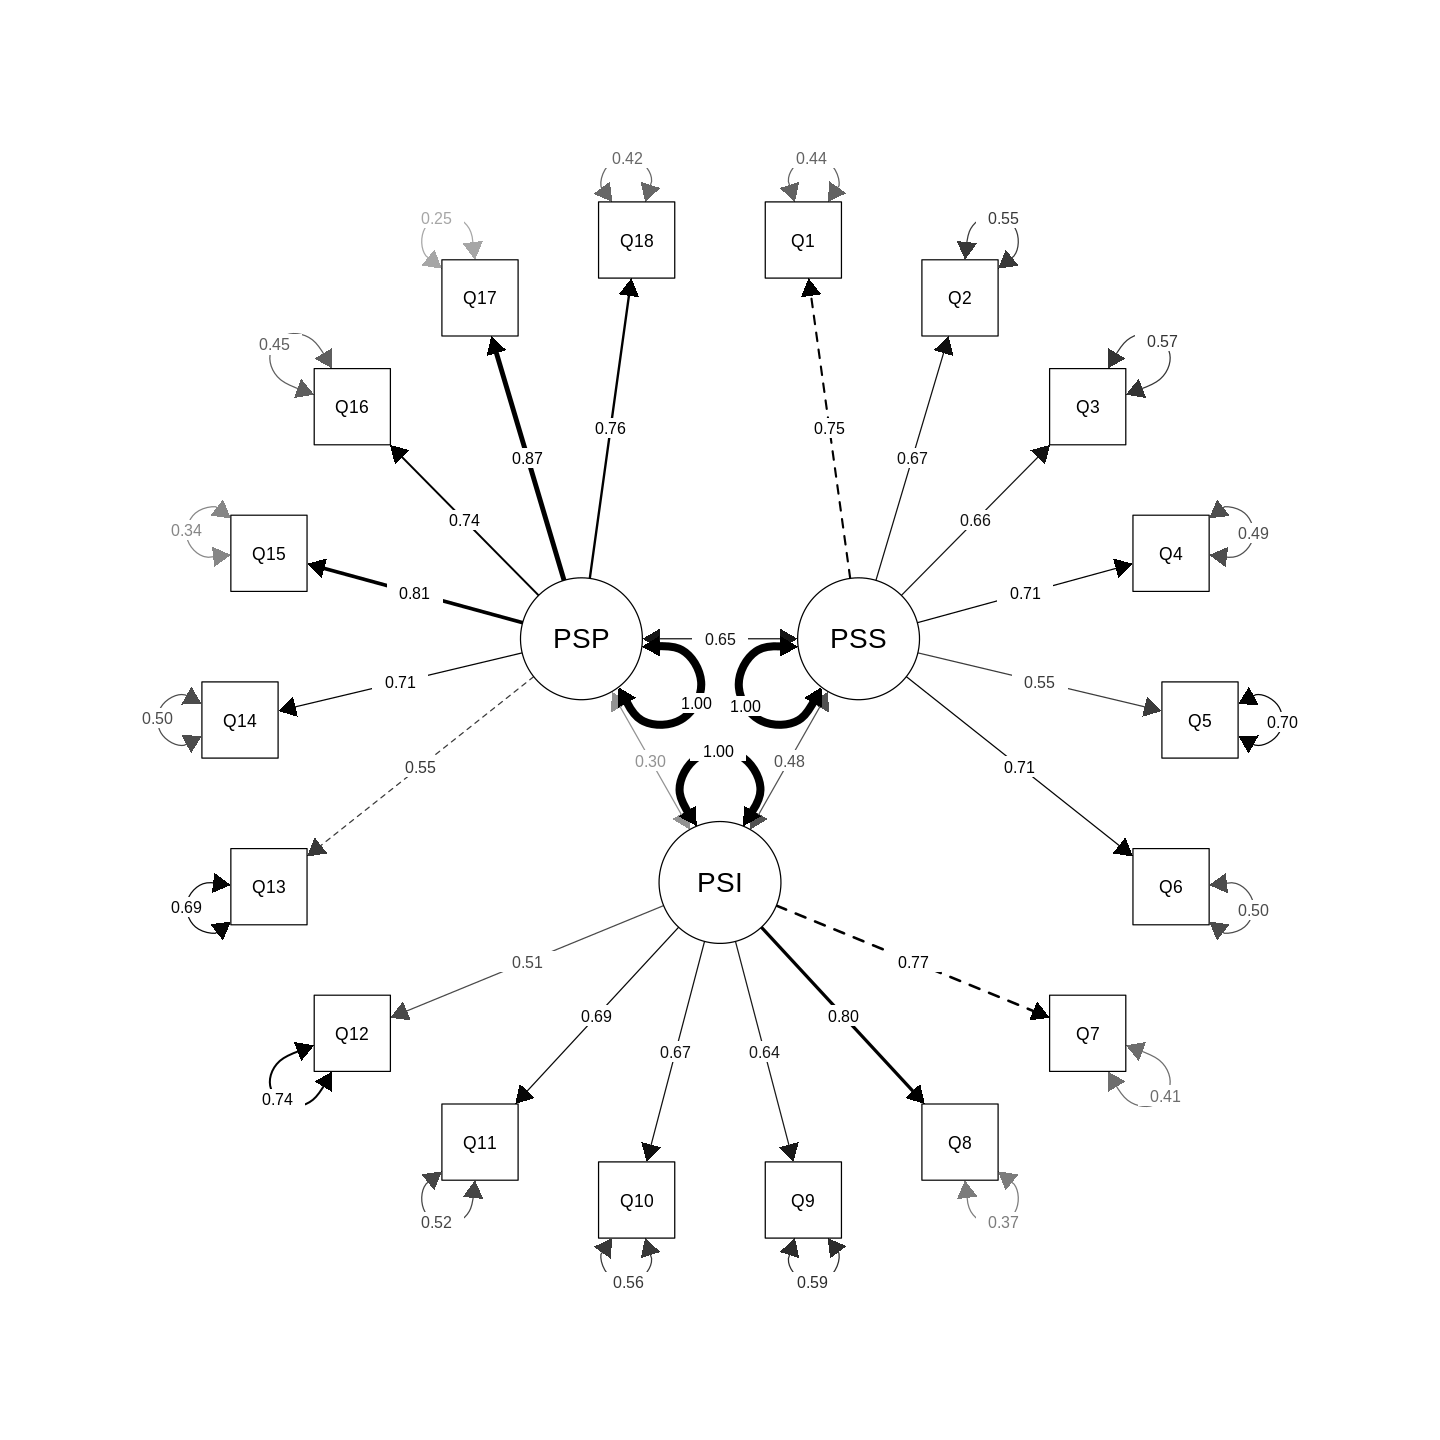

In [50]:


# Load necessary library
#install.packages("semPlot")
library(semPlot)

# Set margins (bottom, left, top, right)
par(mar = c(5, 5, 5, 5))  # Adjust as needed

# Optionally set canvas size (for R Markdown or interactive sessions)
options(repr.plot.width = 12, repr.plot.height = 12)  # Set width and height

# Create your SEM path diagram with adjusted parameters
semPaths(
  fit,
  what = "std",
  layout = "circle2",
  residuals = TRUE,
  edge.color = c("black"),
  edge.label.cex = 0.8,
  label.cex = 1.2,
  style = "ram",
  exoCov = TRUE,
  rotation = 3
)




In [12]:
library(psych)
library(qgraph)
library(GPArotation)



Attaching package: ‘psych’


The following object is masked from ‘package:lavaan’:

    cor2cov



Attaching package: ‘GPArotation’


The following objects are masked from ‘package:psych’:

    equamax, varimin




In [13]:
sessionInfo()


R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] GPArotation_2024.3-1 qgraph_1.9.8         psych_2.4.6.26      
[4] semPlot_1.1.6        lavaan_0.6-19        readr_2.1.5         

loaded via a namespace (and not attached):
 

In [18]:
# Perform EFA with 3 factors (adjust the number of factors as needed)
efa_result <- fa(data_cfa, nfactors = 3, rotate = "oblimin", fm = "ml")

# Print factor loadings
print(efa_result$loadings, cutoff = 0.3)



Loadings:
    ML1    ML2    ML3   
Q1                 0.765
Q2                 0.624
Q3                 0.473
Q4                 0.658
Q5   0.453              
Q6                 0.607
Q7          0.738       
Q8          0.773       
Q9          0.602       
Q10         0.605       
Q11         0.667       
Q12         0.624       
Q13  0.703              
Q14  0.785              
Q15  0.750              
Q16  0.783              
Q17  0.733              
Q18  0.633              

                 ML1   ML2   ML3
SS loadings    3.563 2.847 2.369
Proportion Var 0.198 0.158 0.132
Cumulative Var 0.198 0.356 0.488


In [19]:
# Extract the loadings matrix and convert to a matrix
loadings_matrix <- as.matrix(efa_result$loadings)

# Replace any NA values with 0 to ensure compatibility with qgraph
loadings_matrix[is.na(loadings_matrix)] <- 0

# Print the prepared loadings matrix
print(loadings_matrix)



Loadings:
    ML1    ML2    ML3   
Q1          0.128  0.765
Q2   0.176         0.624
Q3   0.240         0.473
Q4          0.173  0.658
Q5   0.453         0.272
Q6   0.110         0.607
Q7          0.738       
Q8          0.773       
Q9          0.602  0.168
Q10         0.605  0.130
Q11         0.667       
Q12 -0.119  0.624 -0.138
Q13  0.703  0.155 -0.277
Q14  0.785  0.156 -0.152
Q15  0.750         0.133
Q16  0.783 -0.145       
Q17  0.733         0.225
Q18  0.633         0.232

                 ML1   ML2   ML3
SS loadings    3.563 2.847 2.369
Proportion Var 0.198 0.158 0.132
Cumulative Var 0.198 0.356 0.488


In [20]:
# Prepare a custom layout to spread nodes
n_factors <- 3
n_items <- nrow(loadings_matrix)

layout_matrix <- matrix(NA, nrow = n_items + n_factors, ncol = 2)

# Factors at the top
layout_matrix[1:n_factors, ] <- cbind(1:n_factors, 5)

# Items spaced below each factor
layout_matrix[(n_factors + 1):nrow(layout_matrix), ] <- cbind(
  rep(1:n_factors, each = n_items / n_factors),
  seq(4, 1, length.out = n_items / n_factors)
)

# Verify the layout
print(layout_matrix)


      [,1] [,2]
 [1,]    1  5.0
 [2,]    2  5.0
 [3,]    3  5.0
 [4,]    1  4.0
 [5,]    1  3.4
 [6,]    1  2.8
 [7,]    1  2.2
 [8,]    1  1.6
 [9,]    1  1.0
[10,]    2  4.0
[11,]    2  3.4
[12,]    2  2.8
[13,]    2  2.2
[14,]    2  1.6
[15,]    2  1.0
[16,]    3  4.0
[17,]    3  3.4
[18,]    3  2.8
[19,]    3  2.2
[20,]    3  1.6
[21,]    3  1.0


Warning message in (function (input, ...) :
“Length of 'asize' is not equal to the number of edges”


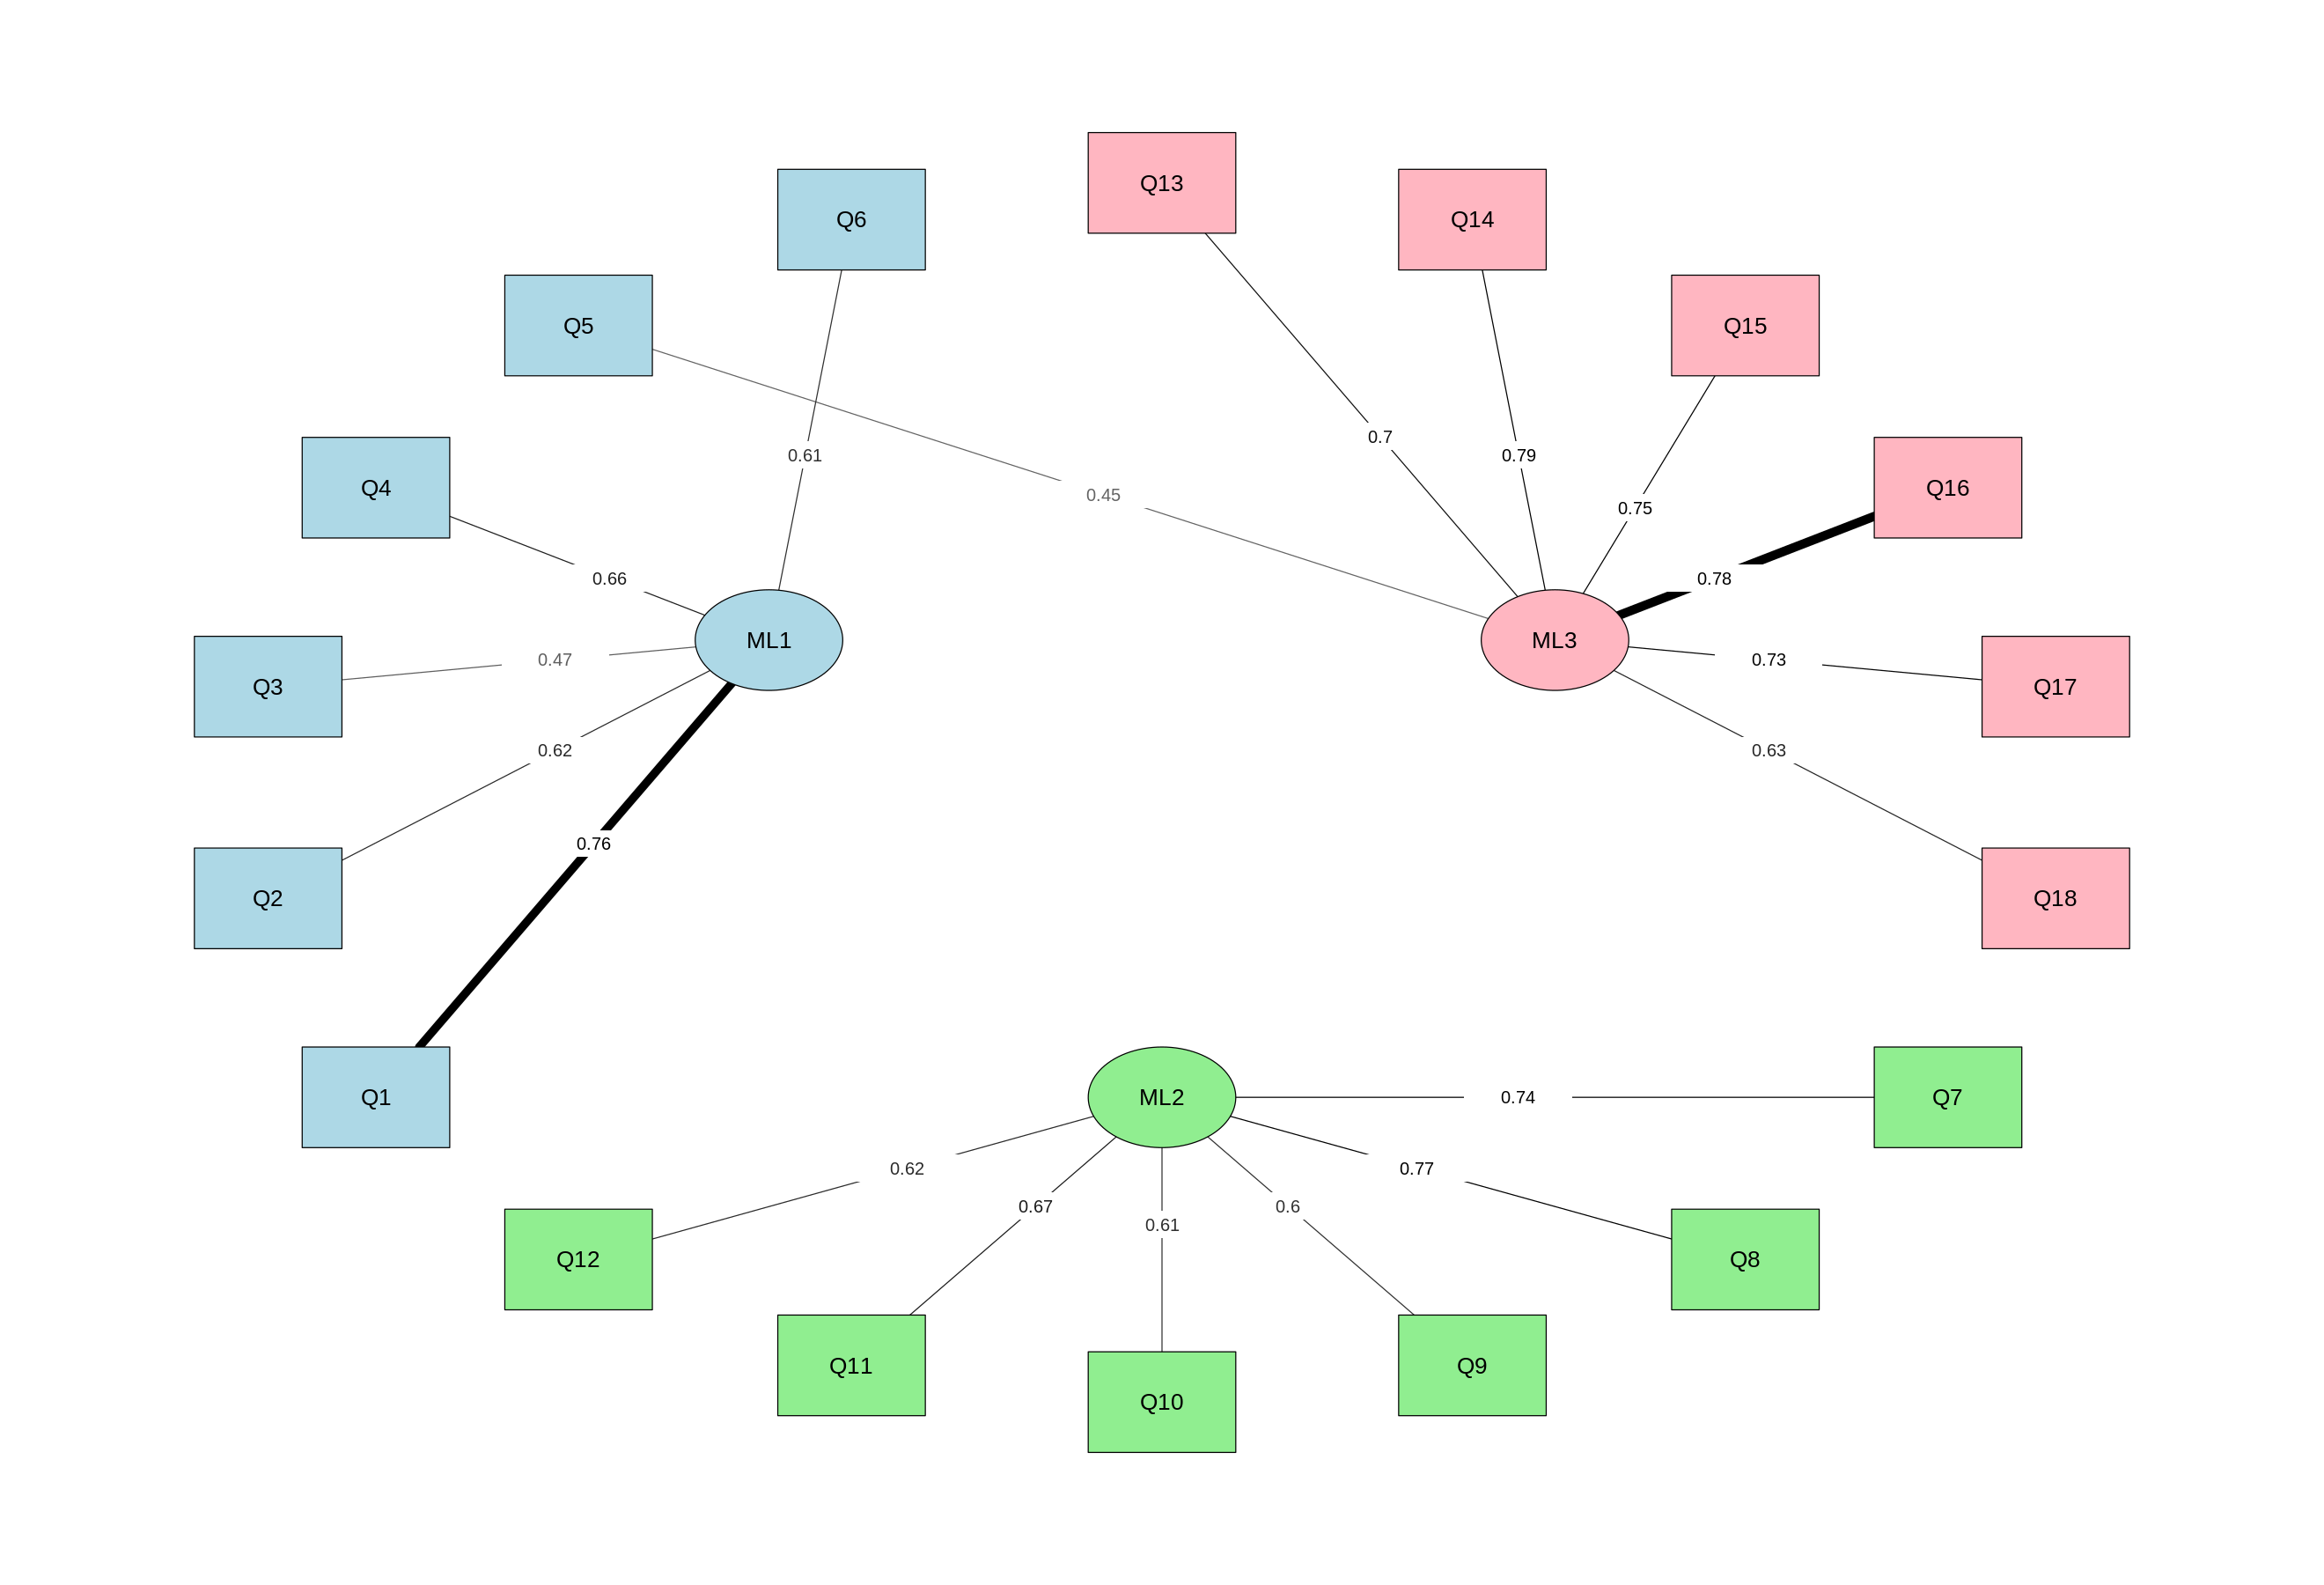

In [51]:
# Define item labels only (Q1–Q18)
item_labels <- paste0("Q", 1:18)

# Define a clean graph with adjusted parameters
options(repr.plot.width = 22, repr.plot.height = 15)  # Adjust canvas size

qgraph(
  filtered_loadings,
  layout = "circle",                 # Use the spring layout
  vsize = 6,                         # Node size
  labels = item_labels,              # Use only Q1–Q18 as labels
  edge.width = abs(filtered_loadings) * 1.5,  # Scale edge widths
  edge.color = "black",              # Edge color
  edge.labels = TRUE,                # Show edge labels
  label.cex = 1.5,
  repulsion = TRUE,                  # Adjust label size
  borders = TRUE,                    # Add borders for clarity
  groups = list("ML1" = 1:6, "ML2" = 7:12, "ML3" = 13:18), # Define groups
  color = c("lightblue", "lightgreen", "lightpink"),  # Different colors for factors
  asize = 18                     # Set as NULL or omit if not needed
)


Warning message in (function (input, ...) :
“Length of 'asize' is not equal to the number of edges”


Legend:
Q1: Czuję, że muszę być doskonały we wszystkim, co robię.
Q2: Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.
Q3: Nawet drobne błędy wywołują u mnie silny dyskomfort.
Q4: Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.
Q5: Porównuję się z innymi, aby ocenić swoje osiągnięcia.
Q6: Uważam, że nie mogę sobie pozwolić na porażkę.
Q7: Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.
Q8: Krytycznie oceniam osiągnięcia innych ludzi.
Q9: Czuję, że inni mogą zrobić coś lepiej niż to zrobili.
Q10: Nie toleruję błędów popełnianych przez innych.
Q11: Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.
Q12: Wyrażam swoje niezadowolenie z pracy innych.
Q13: Czuję, że inni oczekują ode mnie doskonałości.
Q14: Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.
Q15: Czuję presję, aby być idealnym w oczach innych.
Q16: Obawiam się, że zawiodę oczekiwania innych.
Q17: Czuję, że muszę udowodnić swoją wartość innym.
Q18: Myślę 

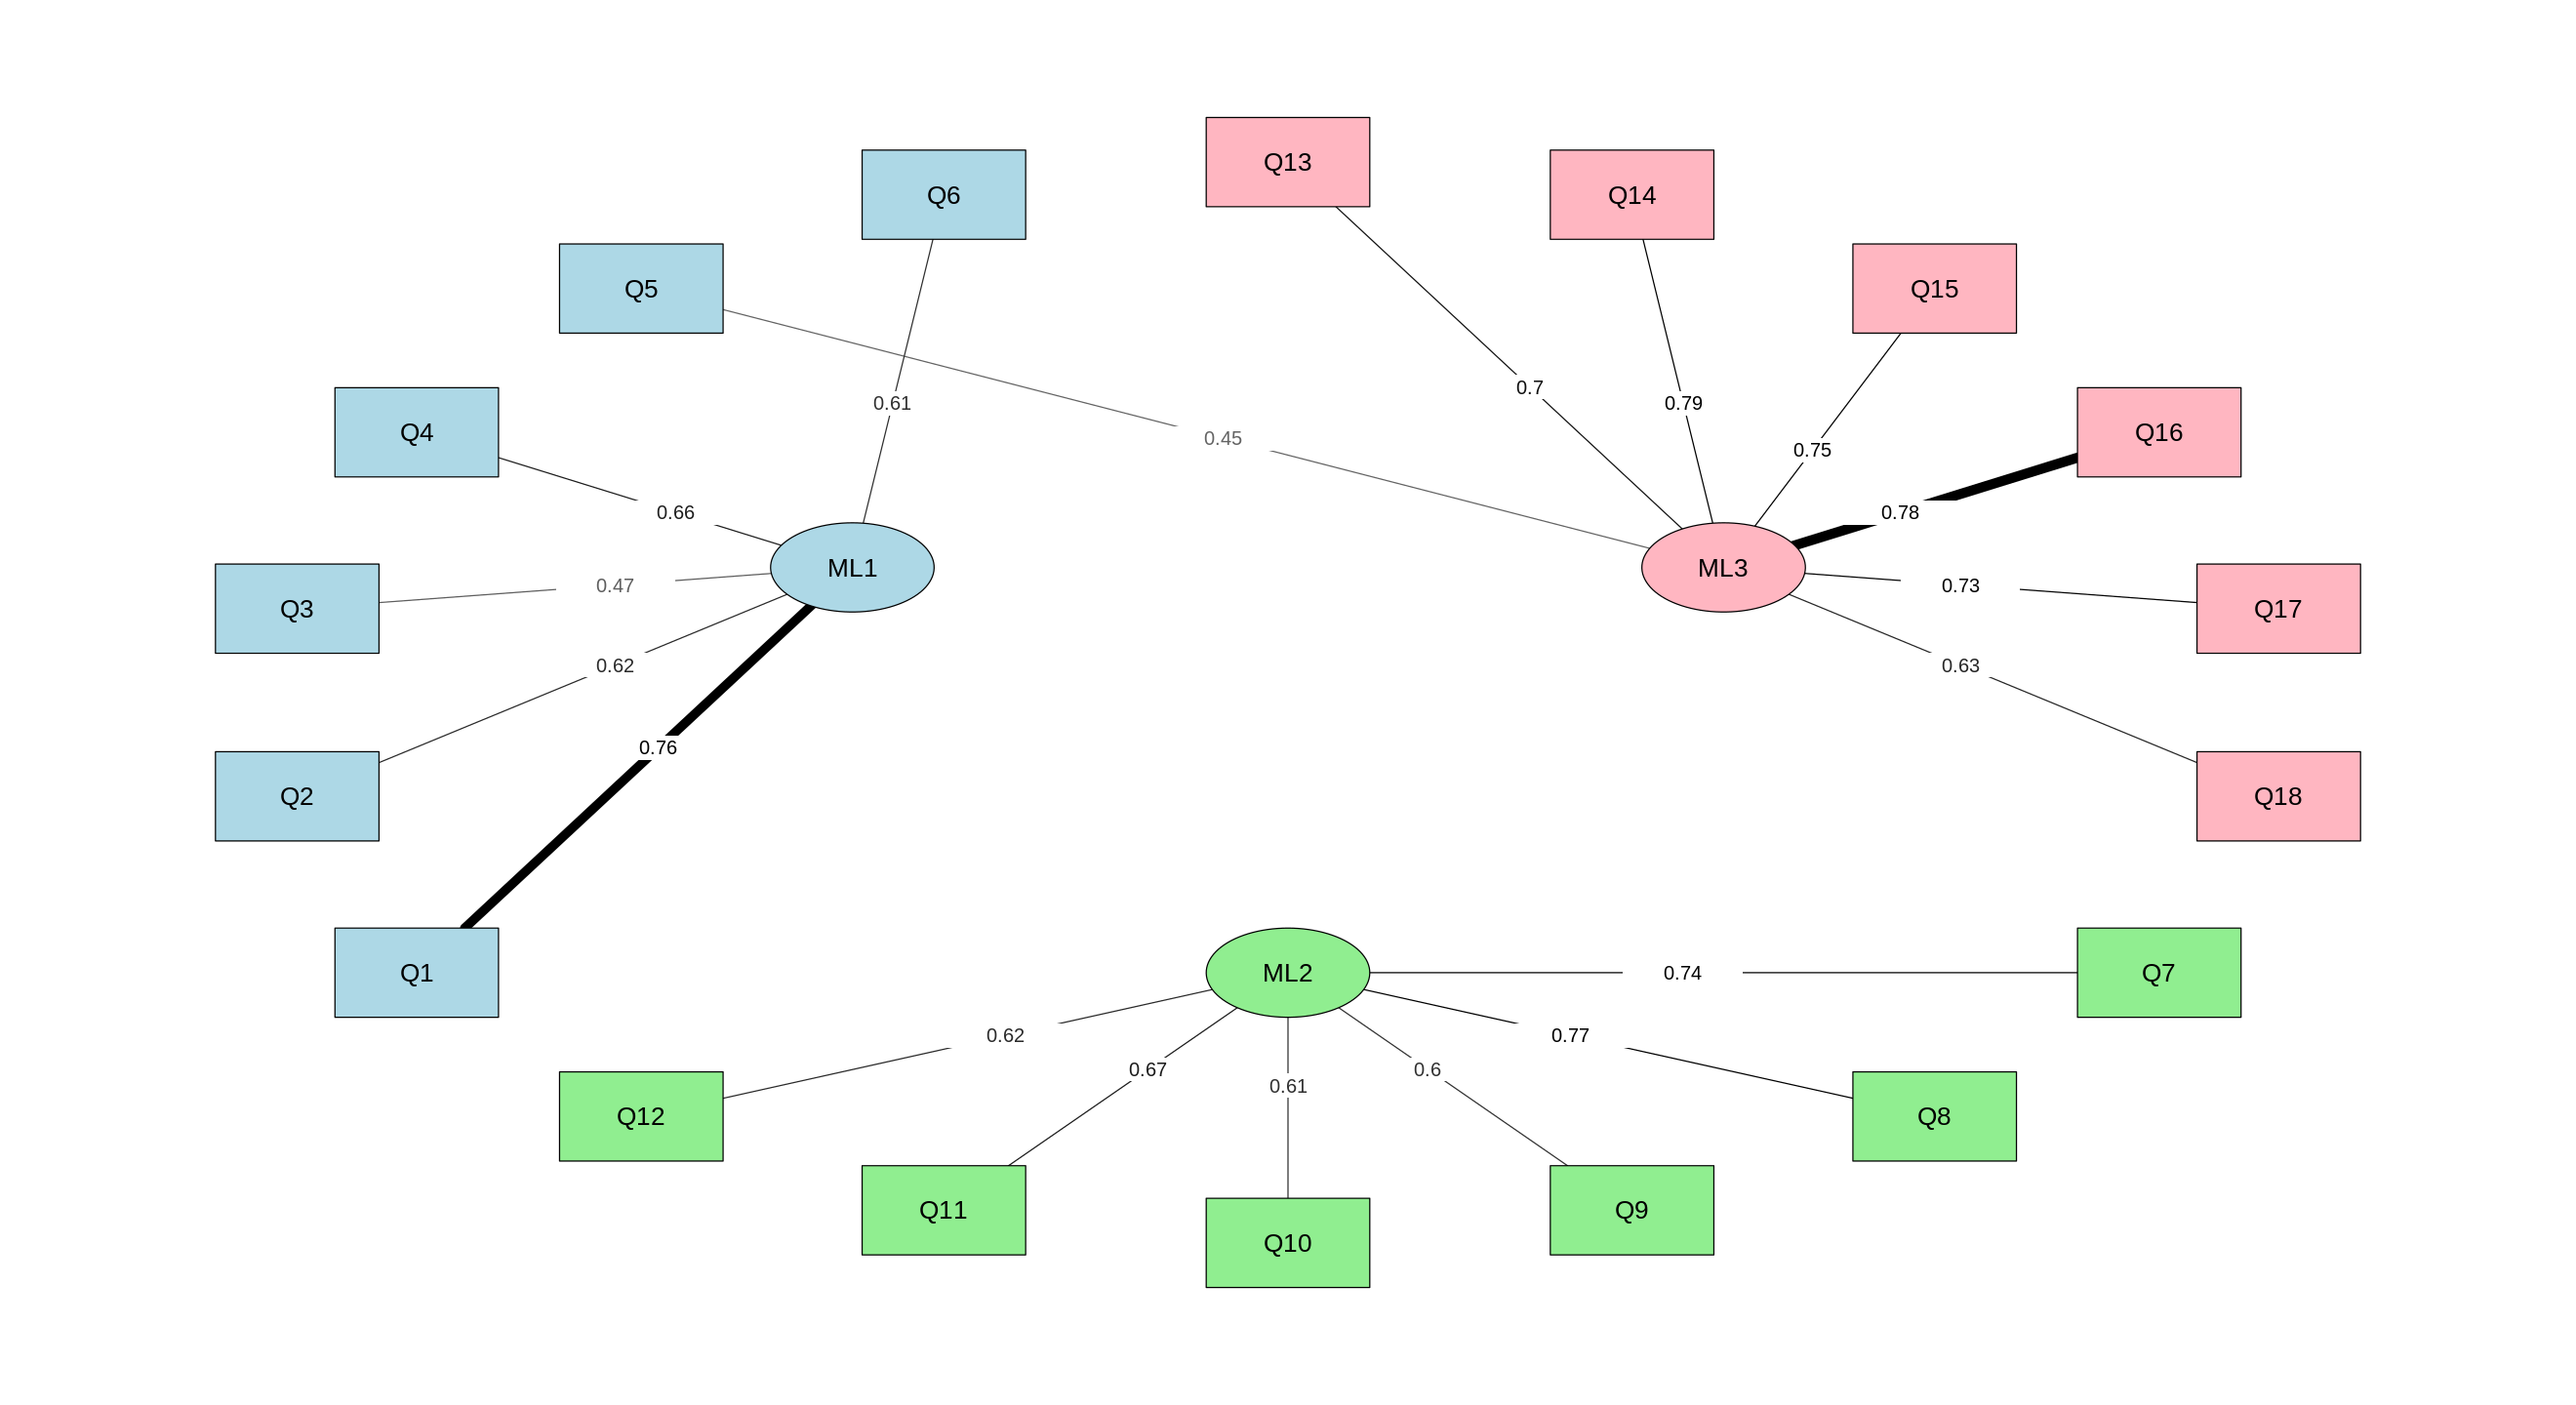

In [52]:
# Define the actual questions corresponding to Q1–Q18
question_text <- c(
  "Q1: Czuję, że muszę być doskonały we wszystkim, co robię.",
  "Q2: Gdy nie osiągam swoich wysokich standardów, czuję się zawiedziony/a.",
  "Q3: Nawet drobne błędy wywołują u mnie silny dyskomfort.",
  "Q4: Czuję, że muszę być lepszy od innych, aby móc się czuć spełniony.",
  "Q5: Porównuję się z innymi, aby ocenić swoje osiągnięcia.",
  "Q6: Uważam, że nie mogę sobie pozwolić na porażkę.",
  "Q7: Oczekuję, że inni będą wykonywać swoje zadania perfekcyjnie.",
  "Q8: Krytycznie oceniam osiągnięcia innych ludzi.",
  "Q9: Czuję, że inni mogą zrobić coś lepiej niż to zrobili.",
  "Q10: Nie toleruję błędów popełnianych przez innych.",
  "Q11: Czuję się sfrustrowany, gdy inni nie spełniają moich oczekiwań.",
  "Q12: Wyrażam swoje niezadowolenie z pracy innych.",
  "Q13: Czuję, że inni oczekują ode mnie doskonałości.",
  "Q14: Mam wrażenie, że muszę spełniać wysokie oczekiwania innych.",
  "Q15: Czuję presję, aby być idealnym w oczach innych.",
  "Q16: Obawiam się, że zawiodę oczekiwania innych.",
  "Q17: Czuję, że muszę udowodnić swoją wartość innym.",
  "Q18: Myślę o tym, co inni sądzą o moich osiągnięciach."
)

# Plot the graph
options(repr.plot.width = 22, repr.plot.height = 12)

qgraph(
  filtered_loadings,
  layout = "circle",
  vsize = 6,                         # Node size
  labels = item_labels,              # Use only Q1–Q18 as labels
  edge.width = abs(filtered_loadings) * 1.5,
  edge.color = "black",
  edge.labels = TRUE,
  label.cex = 1.5,
  borders = TRUE,
  groups = list("ML1" = 1:6, "ML2" = 7:12, "ML3" = 13:18),
  color = c("lightblue", "lightgreen", "lightpink"),
  asize = 18
)

# Print the legend as a separate output
cat("Legend:\n")
cat(paste(question_text, collapse = "\n"), "\n")
